In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/Preprocessed_data.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,78.0,0,1,0,101.665015,6.6,140,0
1,0,75.0,1,1,3,23.212811,4.8,155,0
2,1,16.0,0,0,0,28.156373,6.6,85,0
3,1,46.0,0,0,0,16.546449,6.5,200,1
4,1,82.0,0,0,5,25.621355,5.7,85,0


**Model Training**
- Create Dataset

In [4]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
X, y

(       gender        age  hypertension  heart_disease  smoking_history  \
 0           3  78.000000             0              1                0   
 1           0  75.000000             1              1                3   
 2           1  16.000000             0              0                0   
 3           1  46.000000             0              0                0   
 4           1  82.000000             0              0                5   
 ...       ...        ...           ...            ...              ...   
 97498       1  81.000000             0              0                5   
 97499       1  41.598755             0              0                5   
 97500       0  70.000000             0              0                2   
 97501       1  23.000000             0              0                0   
 97502       1  54.000000             0              0                3   
 
               bmi  HbA1c_level  blood_glucose_level  
 0      101.665015          6.6            

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle=True)

In [6]:
print(f'Length Train Data={len(X_train)}\nLength Test Data={len(X_test)}')

Length Train Data=68252
Length Test Data=29251


**Model Training**

1- Decision Tree Classifier

In [7]:
target_names = ['Non-Diabetes', 'Diabetes']

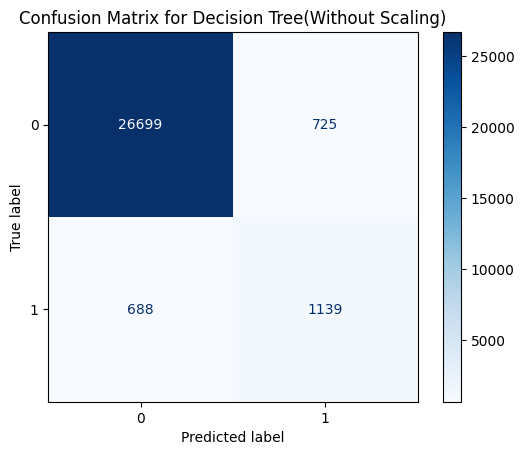

Classification Report for Decision Tree(Without Scaling):

              precision    recall  f1-score   support

Non-Diabetes       0.97      0.97      0.97     27424
    Diabetes       0.61      0.62      0.62      1827

    accuracy                           0.95     29251
   macro avg       0.79      0.80      0.80     29251
weighted avg       0.95      0.95      0.95     29251



In [8]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

tree_cm = confusion_matrix(y_test, tree_pred)
cmd = ConfusionMatrixDisplay(tree_cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree(Without Scaling)')
plt.show()

print('Classification Report for Decision Tree(Without Scaling):\n')
print(classification_report(y_test, tree_pred, target_names=target_names))

In [9]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

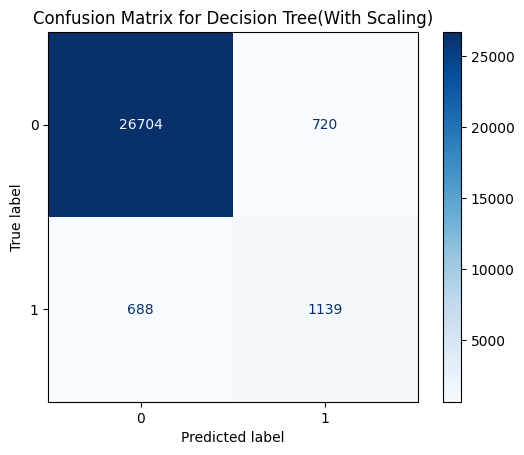

Classification Report for Decision Tree(With Scaling):

              precision    recall  f1-score   support

Non-Diabetes       0.97      0.97      0.97     27424
    Diabetes       0.61      0.62      0.62      1827

    accuracy                           0.95     29251
   macro avg       0.79      0.80      0.80     29251
weighted avg       0.95      0.95      0.95     29251



In [10]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_std, y_train)
tree_pred = tree.predict(X_test_std)

tree_cm = confusion_matrix(y_test, tree_pred)
cmd = ConfusionMatrixDisplay(tree_cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree(With Scaling)')
plt.show()

print('Classification Report for Decision Tree(With Scaling):\n')
print(classification_report(y_test, tree_pred, target_names=target_names))

**Model Training**
2- Support Vector Machine

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Without Scaling)')
plt.show()

print('Classification Report for SVM (Without Scaling):\n')
print(classification_report(y_test, svm_pred))

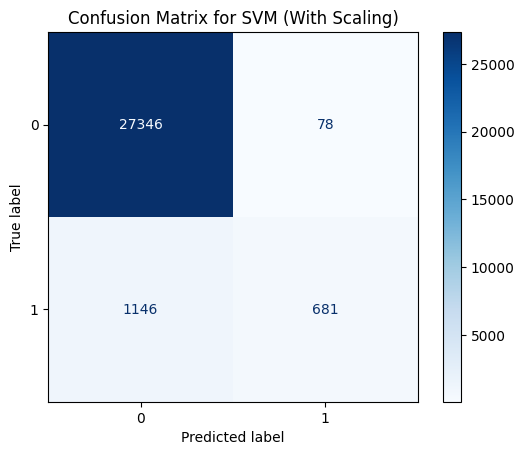

Classification Report for SVM (With Scaling):

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27424
           1       0.90      0.37      0.53      1827

    accuracy                           0.96     29251
   macro avg       0.93      0.68      0.75     29251
weighted avg       0.96      0.96      0.95     29251



In [11]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_std, y_train)

svm_pred = svm.predict(X_test_std)

svm_cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (With Scaling)')
plt.show()

print('Classification Report for SVM (With Scaling):\n')
print(classification_report(y_test, svm_pred))

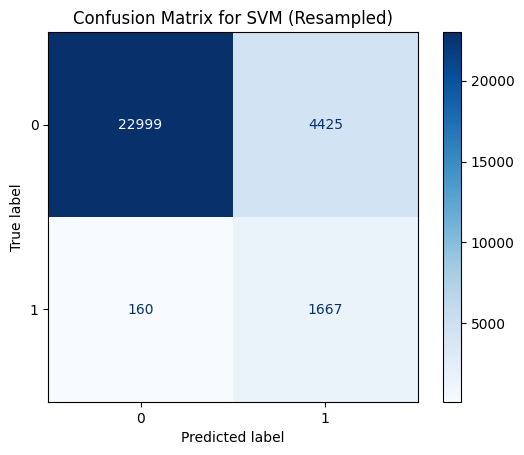

Classification Report for SVM (Resampled):

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     27424
           1       0.27      0.91      0.42      1827

    accuracy                           0.84     29251
   macro avg       0.63      0.88      0.67     29251
weighted avg       0.95      0.84      0.88     29251



In [12]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_res, y_train_res)


svm_pred = svm.predict(X_test)

svm_cm = confusion_matrix(y_test, svm_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=svm_cm)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM (Resampled)')
plt.show()

print('Classification Report for SVM (Resampled):\n')
print(classification_report(y_test, svm_pred))